In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

trainFileName = "C:\\Users\\admin\\Desktop\\ML-Exp4\\u1.base"
testFileName = "C:\\Users\\admin\\Desktop\\ML-Exp4\\u1.test"


#读取数据和处理数据函数
def dataRead(fileName):
    data = np.loadtxt(fileName)
    data = data[:, 0:3]
    userSum = int(data.max(axis=0)[0])
    itemSum = int(data.max(axis=0)[1])
    R = np.zeros((userSum, itemSum))
    for i in range(data.shape[0]):
        userNum = int(data[i, :][0])
        itemNum = int(data[i, :][1])
        R[userNum - 1, itemNum - 1] = data[i, :][2]
    return R


In [3]:
#定义loss函数
def loss(R,P,Q,lamda):
    loss=0
    for i in range(len(R)):
        for j in range(len(R[i])):
            if R[i][j] > 0:
                loss = loss + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                for k in range(K):
                    loss = loss + lamda * (pow(P[i][k],2) + pow(Q[k][j],2))
    return loss

In [4]:
#矩阵分解迭代最下化loss
def matrixFactorization(R,Rtest,P,Q,K,numIt,alpha,lamda):
    Loss=np.zeros((numIt,1))
    stopNumIt=0
    for n in range(numIt):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    unit=R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (unit * Q[k][j] - lamda * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (unit * P[i][k] - lamda * Q[k][j])

        lossNow=loss(Rtest,P,Q,lamda)
        Loss[n]=lossNow
        if n>1:
            if Loss[n-1]-Loss[n]> 0 :
                if Loss[n - 1] - Loss[n] < 0.01 :
                    stopNumIt=n
                    break

    return P,Q,Loss

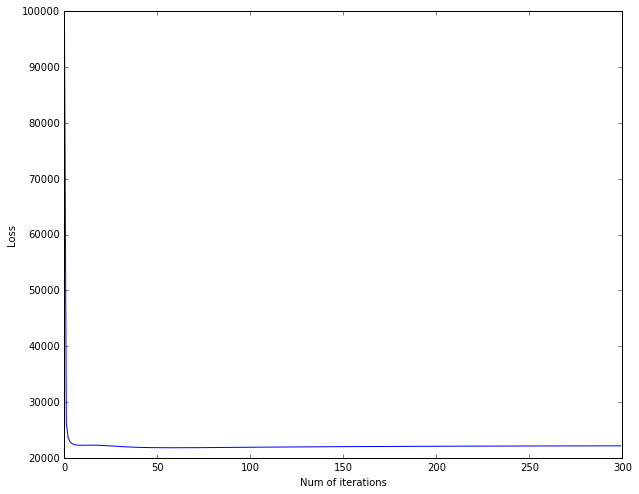

In [5]:
#读取训练集和测试集数据
Rtrain=dataRead(trainFileName)
Rtest=dataRead(testFileName)
#特征数量
K=3
#迭代次数
numOfIt=300
#分解矩阵 随机初始化
P=np.random.rand(943,K)
Q=np.random.rand(K,1682)
#迭代下降
rP,rQ,Loss=matrixFactorization(Rtrain,Rtest,P,Q,K,numOfIt,0.01,0.02)

#画图
x=np.arange(0,numOfIt,1)
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(x,Loss)
plt.xlabel('Num of iterations')
plt.ylabel('Loss')
plt.show()

In [6]:
RPredict=rP.dot(rQ)
print(RPredict)

[[ 3.76982235  3.12501457  3.04402243 ...,  2.29739103  3.64340023
   3.35832306]
 [ 3.97949544  3.23744767  2.17025641 ...,  2.1649839   3.8340876
   3.23234384]
 [ 3.40638099  2.76362235  2.69748798 ...,  2.14782914  3.3272622
   3.03535194]
 ..., 
 [ 4.29040289  3.70972113  3.04977061 ...,  2.24589443  4.03047319
   3.64569773]
 [ 4.42313436  4.02042089  2.08757506 ...,  1.66615849  3.9812754
   3.36600332]
 [ 3.62061482  3.31480505  4.06870055 ...,  2.12438592  3.35806875
   3.49662464]]
